In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# Loading the data
dataset = pd.read_csv('Medical_insurance_dataset.csv')
dataset.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [3]:
dataset.shape

(400, 5)

In [4]:
#Drop "User ID" because it won't be useful
dataset.drop(['User ID'], axis = 'columns', inplace= True)
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased


In [5]:
##Recode 'Purchased to 1 and Non-Purchased to 0'. Transform the output to numeric
dataset['Purchased']= dataset['Purchased'].apply(lambda x: 1 if x == 'purchased' else 0)
dataset.head(20)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

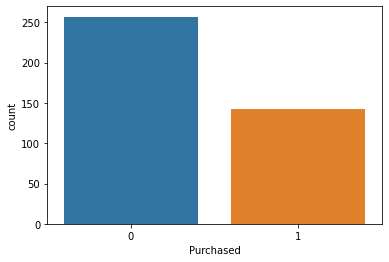

In [6]:
##EDA
sns.countplot(x = 'Purchased', data = dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

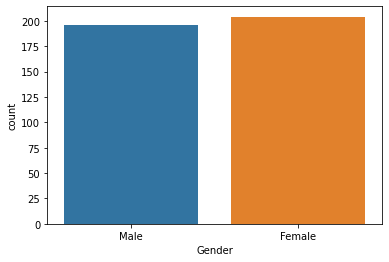

In [7]:
sns.countplot(x = 'Gender', data = dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

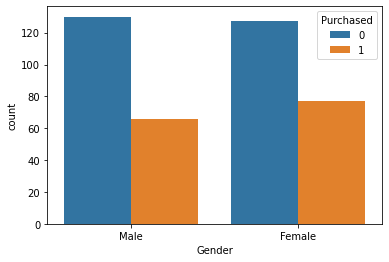

In [8]:
sns.countplot(x = 'Gender', hue = 'Purchased', data = dataset)

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

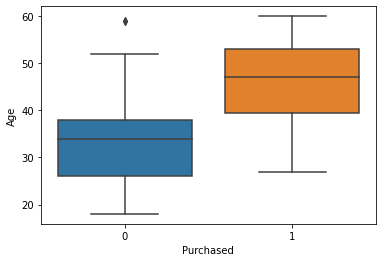

In [9]:
sns.boxplot(x = 'Purchased', y = 'Age', data = dataset)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

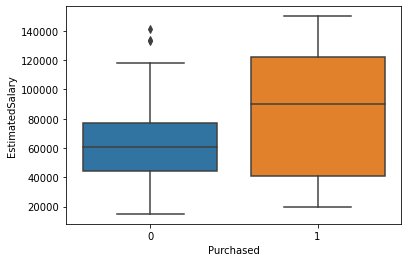

In [10]:
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = dataset)

In [11]:
##Import machine learning models
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [12]:
##One hot encoding. Some algorithms can not work with Categorical data. so, you have to change them to numeric
dataset['Gender'] = pd.get_dummies(dataset['Gender'])

In [13]:
##Data Processing


x = dataset.drop(['Purchased'], axis = 'columns') ##Drop the label from the dataset
y = dataset['Purchased']

x.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [14]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
Name: Purchased, dtype: int64

In [22]:
#Split the dataset
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [42]:
##Model Trainnig 

# Building the model
extra_tree_model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2638, verbose=0,
                     warm_start=False)

In [43]:
# Training the model
extra_tree_model.fit(x_train, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=2638)

In [44]:
extra_tree_model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [45]:
extra_tree_model_prediction = extra_tree_model.predict(x_test)

In [46]:
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    ##Confusion matrix function to check model performance
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(5,7))
    sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='BrBG')
    plt.xlabel('Truth', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.xlabel('Predicted', fontsize = 13)
    plt.title('A confusion matrix')

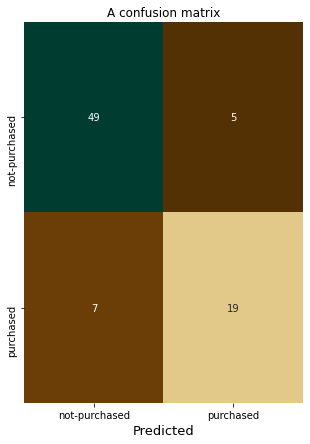

In [47]:
ConfusionMatrix(y_test, extra_tree_model_prediction, label = ['not-purchased', 'purchased'] )

In [48]:
metrics.accuracy_score(y_test, extra_tree_model_prediction)

0.85

In [49]:
metrics.f1_score(y_test, extra_tree_model_prediction)

0.76